# 공기압축기_선박엔진

# 설비명별 데이터프레임 생성

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회")

In [6]:
raw_data = pd.read_csv("공기압축기_선박엔진.csv")

In [7]:
raw_data.head(20)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SVC_NAME,DEVICE_ID,DEVICE_BD_ID,COMPANY_NAME,ESTABLISH_YEAR,LOCATION,COMPANY_TYPE,...,facility_vendor,facility_year,facility_capacity,facility_volt,ITEM_NAME,ITEM_VALUE,TIMESTAMP,역률평균_LABEL,전류고조파평균_LABEL,전압고조파평균_LABEL
0,6338880,0,0,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,누적전력량,270288.200000,2020-10-22 00:00:22,정상,정상,주의
1,6338881,1,1,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,온도,28.125000,2020-10-22 00:00:22,정상,정상,주의
2,6338882,2,2,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,상전압평균,223.500000,2020-10-22 00:00:22,정상,정상,주의
3,6338883,3,3,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,선간전압평균,387.250000,2020-10-22 00:00:22,정상,정상,주의
4,6338884,4,4,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,전압고조파평균,4.817708,2020-10-22 00:00:22,정상,정상,주의
5,6338885,5,5,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,전류평균,70.500000,2020-10-22 00:00:22,정상,정상,주의
6,6338886,6,6,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,전류고조파평균,5.891927,2020-10-22 00:00:22,정상,정상,주의
7,6338887,7,7,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,역률평균,0.948331,2020-10-22 00:00:22,정상,정상,주의
8,6338888,8,8,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,무효전력평균,14954.000000,2020-10-22 00:00:22,정상,정상,주의
9,6338889,9,9,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,주파수,59.872740,2020-10-22 00:00:22,정상,정상,주의


In [8]:
data_295 = raw_data[raw_data['COMPANY_NAME'] == 'CO-295']

In [9]:
data_295['facility_name'].value_counts()

컴프레서_3    1663224
컴프레서_2    1663200
컴프레서_1    1509725
Name: facility_name, dtype: int64

In [10]:
comp_1 = data_295[data_295['facility_name'] == '컴프레서_1']

In [11]:
comp_1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SVC_NAME,DEVICE_ID,DEVICE_BD_ID,COMPANY_NAME,ESTABLISH_YEAR,LOCATION,COMPANY_TYPE,...,facility_vendor,facility_year,facility_capacity,facility_volt,ITEM_NAME,ITEM_VALUE,TIMESTAMP,역률평균_LABEL,전류고조파평균_LABEL,전압고조파평균_LABEL
0,6338880,0,0,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,누적전력량,270288.200000,2020-10-22 00:00:22,정상,정상,주의
1,6338881,1,1,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,온도,28.125000,2020-10-22 00:00:22,정상,정상,주의
2,6338882,2,2,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,상전압평균,223.500000,2020-10-22 00:00:22,정상,정상,주의
3,6338883,3,3,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,선간전압평균,387.250000,2020-10-22 00:00:22,정상,정상,주의
4,6338884,4,4,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,전압고조파평균,4.817708,2020-10-22 00:00:22,정상,정상,주의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509720,7848600,1509720,1509720,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,T상유효전력,0.000000,2020-11-22 23:59:35,경고,정상,주의
1509721,7848601,1509721,1509721,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,T상무효전력,0.000000,2020-11-22 23:59:35,경고,정상,주의
1509722,7848602,1509722,1509722,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,T상역률,0.000000,2020-11-22 23:59:35,경고,정상,주의
1509723,7848603,1509723,1509723,SOH,1338,1,CO-295,1981,경북 고령군,제조,...,artlascopco,2004,86,380,T상전압고조파,3.125000,2020-11-22 23:59:35,경고,정상,주의


In [12]:
col = ['전류평균', '온도', '선간전압평균', '상전압평균', '유효전력평균', '누적전력량', '역률평균', '주파수', '전압고조파평균', '무효전력평균']
comp_clear = comp_1[comp_1['ITEM_NAME']==col[0]].iloc[:,:-6]
for i in range(0,len(col)) : 
    values = list(comp_1[comp_1['ITEM_NAME']==col[i]]['ITEM_VALUE'])
    comp_clear[col[i]] = values

comp_clear['TIMESTAMP'] = list(comp_1[comp_1['ITEM_NAME']==col[0]].iloc[:,-4])   
comp_clear['역률평균_LABEL'] = list(comp_1[comp_1['ITEM_NAME']==col[0]].iloc[:,-3])
comp_clear['전압고조파평균_LABEL'] = list(comp_1[comp_1['ITEM_NAME']==col[0]].iloc[:,-1])

In [13]:
comp_clear = comp_clear.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'], axis=1)

In [14]:
comp_clear

,SVC_NAME,DEVICE_ID,DEVICE_BD_ID,COMPANY_NAME,ESTABLISH_YEAR,LOCATION,COMPANY_TYPE,COMPANY_CAT,MAJOR_PRODUCT,CONTRACT_POWER,...,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균,TIMESTAMP,역률평균_LABEL,전압고조파평균_LABEL
5,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,223.500000,44696.0,2.702882e+05,0.948331,59.872740,4.817708,14954.0,2020-10-22 00:00:22,정상,주의
12,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,223.500000,19313.0,2.708402e+05,0.895390,59.863403,4.817708,9604.5,2020-10-22 00:01:22,정상,주의
22,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,223.333328,44907.0,2.714893e+05,0.948258,59.910122,4.785156,15036.0,2020-10-22 00:02:22,정상,주의
33,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,223.583328,46233.0,2.722598e+05,0.948171,59.872740,4.817708,15494.0,2020-10-22 00:03:22,정상,주의
52,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,223.750000,30076.0,2.729348e+05,0.937192,59.891440,4.817708,11194.0,2020-10-22 00:04:22,정상,주의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508239,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,227.083328,0.0,1.549272e+07,0.000000,59.882076,3.190104,0.0,2020-11-22 23:55:35,경고,주의
1508244,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,227.166672,0.0,1.549272e+07,0.000000,59.798140,3.190104,0.0,2020-11-22 23:56:35,경고,주의
1508257,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,227.000000,0.0,1.549272e+07,0.000000,59.854070,3.125000,0.0,2020-11-22 23:57:35,경고,주의
1508268,SOH,1338,1,CO-295,1981,경북 고령군,제조,열처리,선박엔진,7000,...,226.833328,0.0,1.549272e+07,0.000000,59.816770,3.222656,0.0,2020-11-22 23:58:35,경고,주의


In [15]:
comp_clear.columns

Index(['SVC_NAME', 'DEVICE_ID', 'DEVICE_BD_ID', 'COMPANY_NAME',
       'ESTABLISH_YEAR', 'LOCATION', 'COMPANY_TYPE', 'COMPANY_CAT',
       'MAJOR_PRODUCT', 'CONTRACT_POWER', 'BILL_OPTION', 'KEPCO_INFO',
       'facility_name', 'facility_type_name', 'facility_vendor',
       'facility_year', 'facility_capacity', 'facility_volt', '전류평균', '온도',
       '선간전압평균', '상전압평균', '유효전력평균', '누적전력량', '역률평균', '주파수', '전압고조파평균',
       '무효전력평균', 'TIMESTAMP', '역률평균_LABEL', '전압고조파평균_LABEL'],
      dtype='object')

In [16]:
comp_1_one = comp_clear[['전류평균','역률평균','온도','전압고조파평균','TIMESTAMP']]

In [17]:
comp_1_one

,전류평균,역률평균,온도,전압고조파평균,TIMESTAMP
5,70.500000,0.948331,28.125,4.817708,2020-10-22 00:00:22
12,31.822916,0.895390,28.125,4.817708,2020-10-22 00:01:22
22,70.927086,0.948258,28.125,4.785156,2020-10-22 00:02:22
33,72.843750,0.948171,27.500,4.817708,2020-10-22 00:03:22
52,47.104168,0.937192,28.750,4.817708,2020-10-22 00:04:22
...,...,...,...,...,...
1508239,0.000000,0.000000,16.875,3.190104,2020-11-22 23:55:35
1508244,0.000000,0.000000,16.875,3.190104,2020-11-22 23:56:35
1508257,0.000000,0.000000,17.500,3.125000,2020-11-22 23:57:35
1508268,0.000000,0.000000,16.875,3.222656,2020-11-22 23:58:35


In [18]:
comp_1_one['TIME'] = pd.to_datetime(comp_1_one['TIMESTAMP'])
comp_1_one.drop('TIMESTAMP', axis = 1, inplace=True)
comp_1_one.set_index('TIME', inplace=True)

In [19]:
comp_1_one

,전류평균,역률평균,온도,전압고조파평균
TIME,,,,
2020-10-22 00:00:22,70.500000,0.948331,28.125,4.817708
2020-10-22 00:01:22,31.822916,0.895390,28.125,4.817708
2020-10-22 00:02:22,70.927086,0.948258,28.125,4.785156
2020-10-22 00:03:22,72.843750,0.948171,27.500,4.817708
2020-10-22 00:04:22,47.104168,0.937192,28.750,4.817708
...,...,...,...,...
2020-11-22 23:55:35,0.000000,0.000000,16.875,3.190104
2020-11-22 23:56:35,0.000000,0.000000,16.875,3.190104
2020-11-22 23:57:35,0.000000,0.000000,17.500,3.125000


<AxesSubplot:xlabel='TIME'>

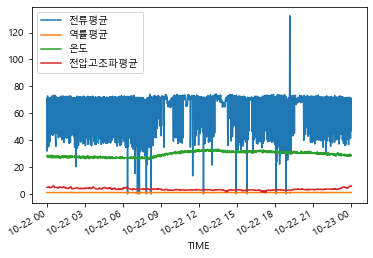

In [20]:
comp_1_one['2020-10-22'].plot()

In [21]:
features = comp_1_one[['전류평균','역률평균','온도','전압고조파평균']]

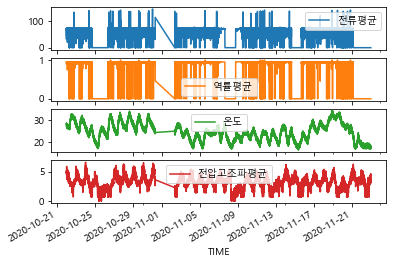

In [22]:
features.plot(subplots=True)
plt.show()

In [23]:
comp_1_one.value_counts()

전류평균        역률평균      온도      전압고조파평균 
0.000000    0.000000  20.625  0.683594    42
                      18.125  1.464844    40
                              0.683594    36
                              1.432292    31
                      17.500  1.432292    30
                                          ..
59.739582   0.946374  19.375  4.980469     1
59.729168   0.955298  20.625  1.464844     1
            0.947429  19.375  3.255208     1
            0.947406  20.000  4.003906     1
144.229172  0.388017  28.125  4.622396     1
Length: 36135, dtype: int64

 # features 평균값과 평균이 아닌값 어떻게 처리할 것인가??

다변량 역률평균값 예측해보기

features 표준화

In [24]:
TRAIN_SPLIT = 30000 #43000

In [25]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std
print(dataset)

[[ 0.66927044  0.41919719  0.90211106  1.56573178]
 [-0.86009332  0.25790493  0.90211106  1.56573178]
 [ 0.68615821  0.41897479  0.90211106  1.53434877]
 ...
 [-2.11843054 -2.47002774 -2.01336463 -0.06618862]
 [-2.11843054 -2.47002774 -2.1848632   0.02796041]
 [-2.11843054 -2.47002774 -2.01336463  0.02796041]]


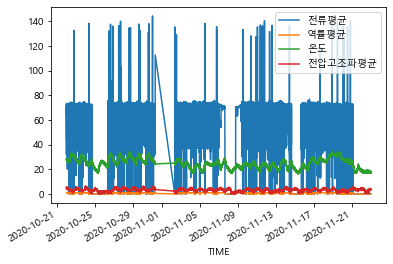

In [125]:
features.plot(subplots=False)
plt.show()

In [126]:
comp_1_one = comp_1_one.values
comp_1_one_mean = comp_1_one[:TRAIN_SPLIT].mean()
comp_1_one_std = comp_1_one[:TRAIN_SPLIT].std()
comp_1_one = (comp_1_one - comp_1_one_mean) / comp_1_one_std  # Standardization

print(comp_1_one)

[[ 2.01450145 -0.79358048  0.30365146 -0.6373581 ]
 [ 0.45295128 -0.79571793  0.30365146 -0.6373581 ]
 [ 2.03174464 -0.79358343  0.30365146 -0.63867235]
 ...
 [-0.83186844 -0.83186844 -0.12532272 -0.70569956]
 [-0.83186844 -0.83186844 -0.1505565  -0.70175679]
 [-0.83186844 -0.83186844 -0.12532272 -0.70175679]]


# 한스텝 예측

In [127]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [128]:
past_history = 720
future_target = 72
STEP = 6 

x_train_single, y_train_single = multivariate_data(comp_1_one, comp_1_one[:, 3], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(comp_1_one, comp_1_one[:, 3], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 4)


In [129]:
BUFFER_SIZE = 100
BATCH_SIZE = 500
EPOCHS = 100
EVALUATION_INTERVAL = 10

In [130]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(500, 1)


Epoch 1/100
10/10 [==============================] - 8s 704ms/step - loss: 0.3561 - val_loss: 0.2325
Epoch 2/100
10/10 [==============================] - 6s 662ms/step - loss: 0.1069 - val_loss: 0.1671
Epoch 3/100
10/10 [==============================] - 6s 650ms/step - loss: 0.0407 - val_loss: 0.1820
Epoch 4/100
10/10 [==============================] - 6s 654ms/step - loss: 0.0436 - val_loss: 0.1822
Epoch 5/100
10/10 [==============================] - 6s 670ms/step - loss: 0.1174 - val_loss: 0.0326
Epoch 6/100
10/10 [==============================] - 6s 669ms/step - loss: 0.0440 - val_loss: 0.0307
Epoch 7/100
10/10 [==============================] - 6s 672ms/step - loss: 0.0544 - val_loss: 0.0387
Epoch 8/100
10/10 [==============================] - 6s 675ms/step - loss: 0.0401 - val_loss: 0.0608
Epoch 9/100
10/10 [==============================] - 6s 679ms/step - loss: 0.0533 - val_loss: 0.0415
Epoch 10/100
10/10 [==============================] - 6s 679ms/step - loss: 0.0393 - val_lo

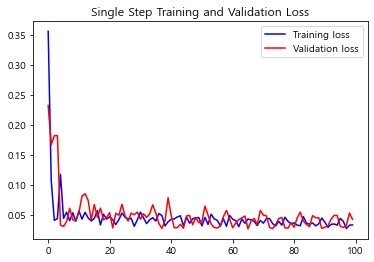

In [131]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

In [132]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [133]:
def create_time_steps(length):
    return list(range(-length, 0))

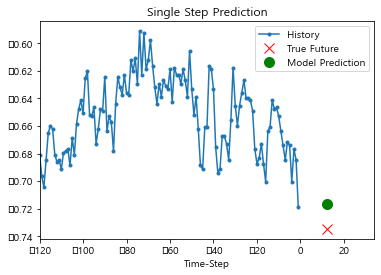

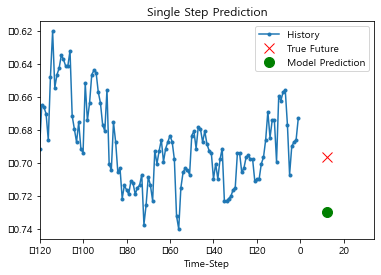

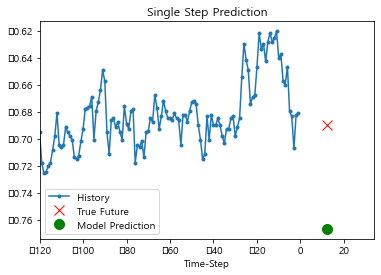

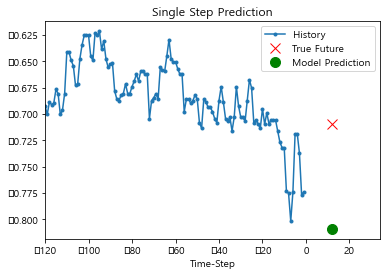

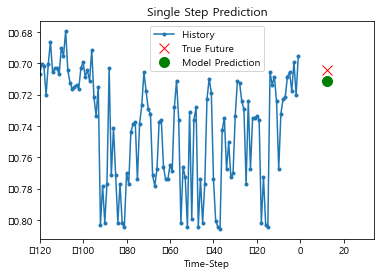

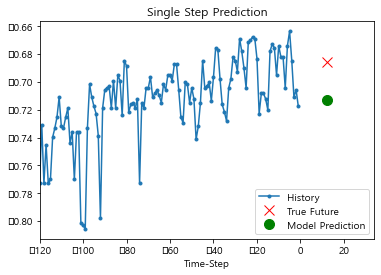

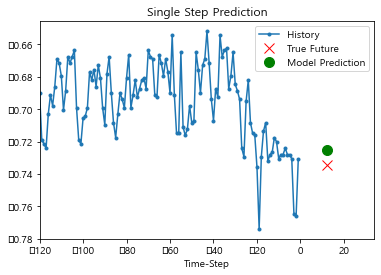

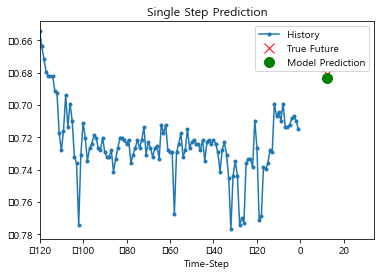

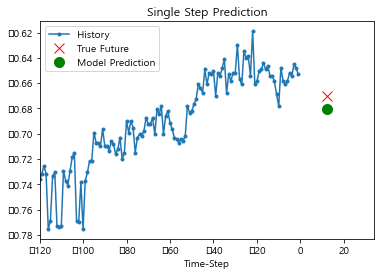

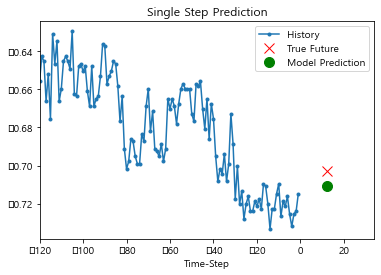

In [134]:
for x, y in val_data_single.take(10):
    plot = show_plot([x[0][:, 3].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    plot.show()

Multi Step

In [135]:
TRAIN_SPLIT = 30000

In [168]:
past_history = 720 # 60분 * 24시간 * 2일
future_target = 72 # 60분*3 -> 1시간 기준으로 3시간후
STEP = 6 #1분 -> 1시간이니까

x_train_multi, y_train_multi = multivariate_data(comp_1_one, comp_1_one[:, 3], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(comp_1_one, comp_1_one[:, 3], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\n Target 역률평균 to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 4)

 Target 역률평균 to predict : (72,)


In [169]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1000 #전체 데이터를 몇 개의 그룹으로 나눠서 학습할때 나누는 그 크기 (최대한 키우기)
EPOCHS = 58 #학습 반복 횟수 (Validation set에서 epoch 늘릴수록 에러 감소하다가 어느 지점에서 다시 증가 -> 최소)
EVALUATION_INTERVAL = 10

In [170]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [171]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True,input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [172]:
for x, y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

(1000, 72)


In [173]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_multi,
                                            validation_steps=50)

Epoch 1/58
10/10 [==============================] - 24s 2s/step - loss: 0.6091 - val_loss: 0.5230
Epoch 2/58
10/10 [==============================] - 21s 2s/step - loss: 0.4252 - val_loss: 0.4489
Epoch 3/58
10/10 [==============================] - 22s 2s/step - loss: 0.3792 - val_loss: 0.3463
Epoch 4/58
10/10 [==============================] - 22s 2s/step - loss: 0.2946 - val_loss: 0.2438
Epoch 5/58
10/10 [==============================] - 23s 2s/step - loss: 0.2076 - val_loss: 0.1737
Epoch 6/58
10/10 [==============================] - 22s 2s/step - loss: 0.1774 - val_loss: 0.1607
Epoch 7/58
10/10 [==============================] - 23s 2s/step - loss: 0.1325 - val_loss: 0.1394
Epoch 8/58
10/10 [==============================] - 23s 2s/step - loss: 0.1020 - val_loss: 0.1021
Epoch 9/58
10/10 [==============================] - 22s 2s/step - loss: 0.0915 - val_loss: 0.0812
Epoch 10/58
10/10 [==============================] - 23s 2s/step - loss: 0.0706 - val_loss: 0.0830
Epoch 11/58
10/10 [

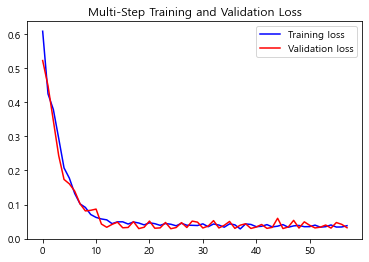

In [174]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(multi_step_history,
                   'Multi-Step Training and Validation Loss')

Multi Step 예측

In [197]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history[:,3]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'b-',label='True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP,np.array(prediction),'r-',label='Predicted Future')
    
    plt.legend(loc='upper left')
    #plt.ylim([-0.81,-0.79])
    plt.xlim([-10,15])
    plt.show()

In [198]:
def create_time_steps(length):
    return list(range(-length,0))

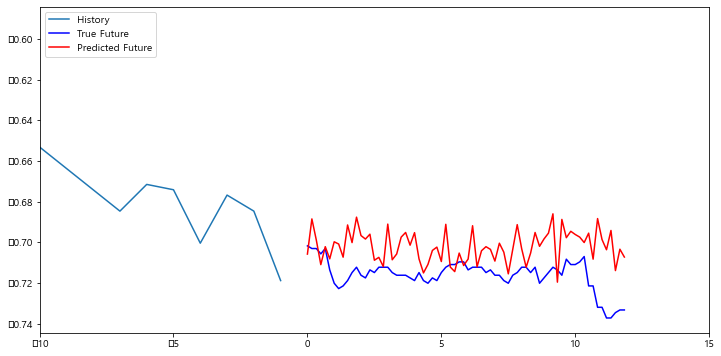

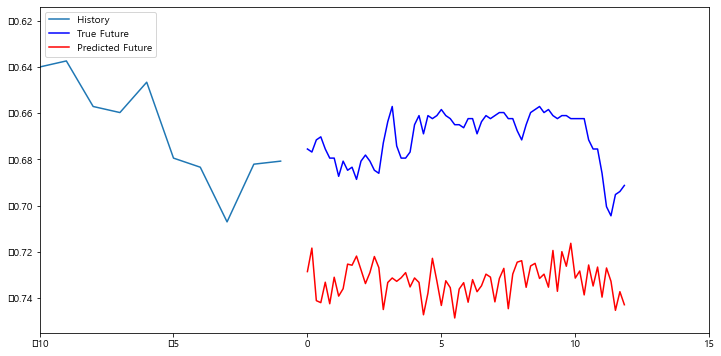

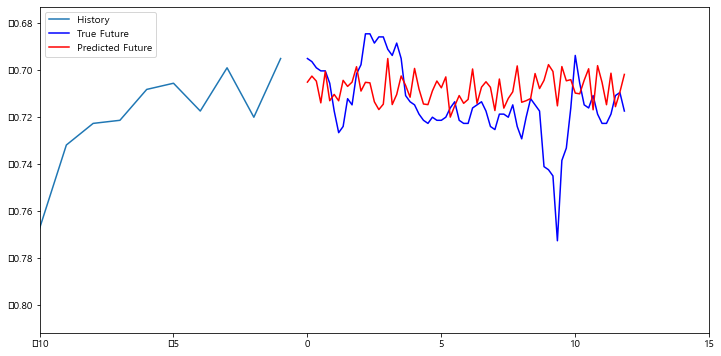

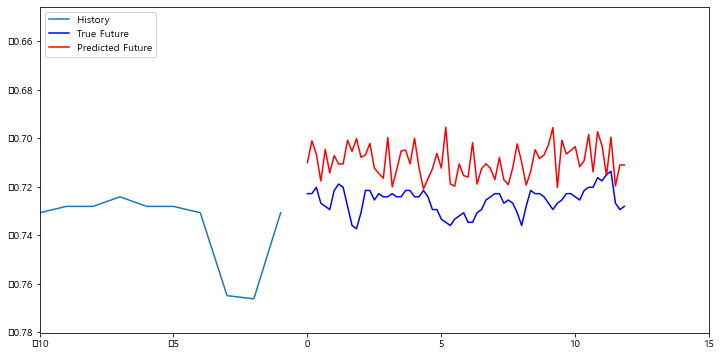

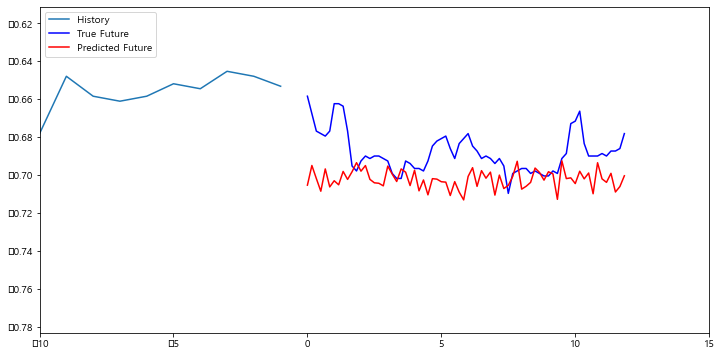

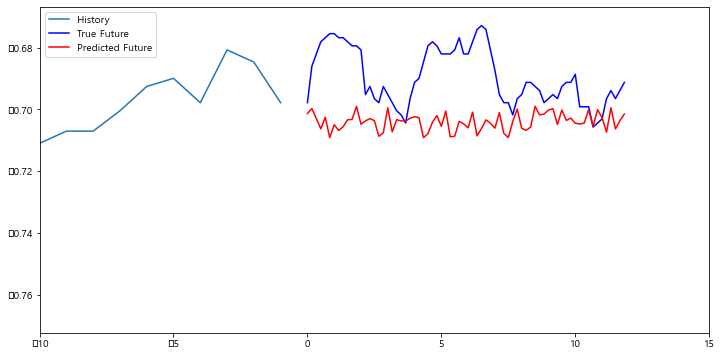

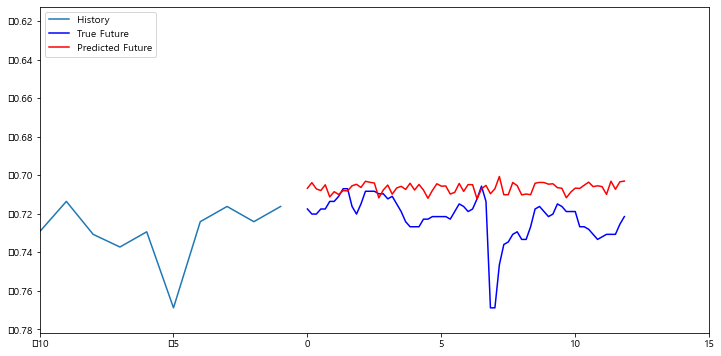

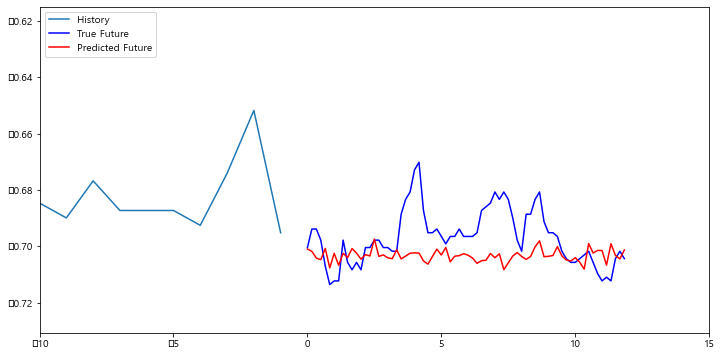

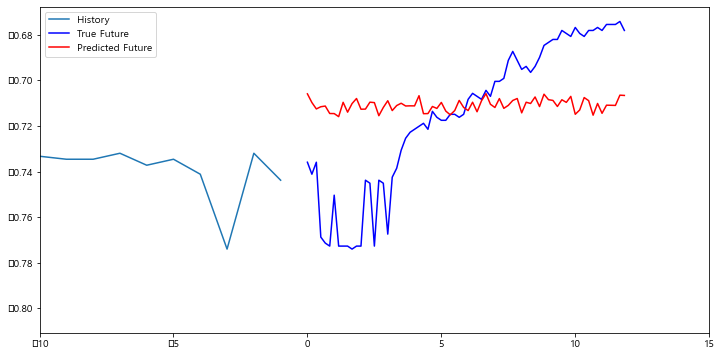

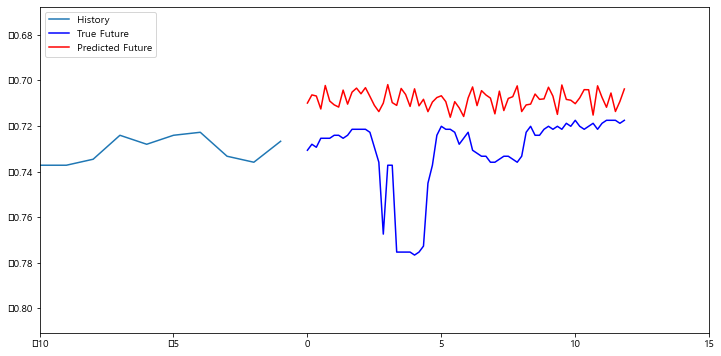

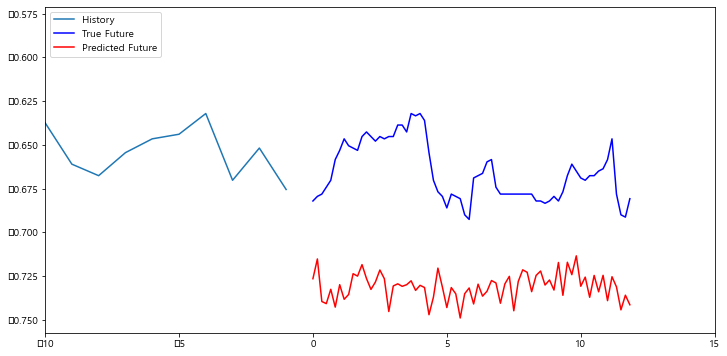

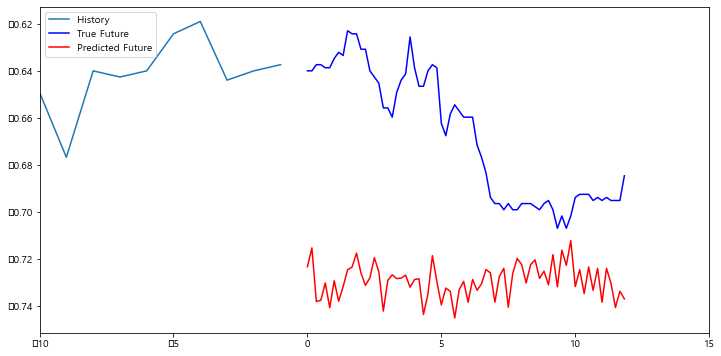

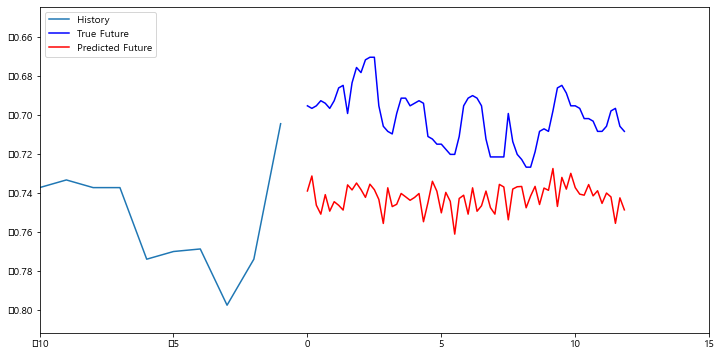

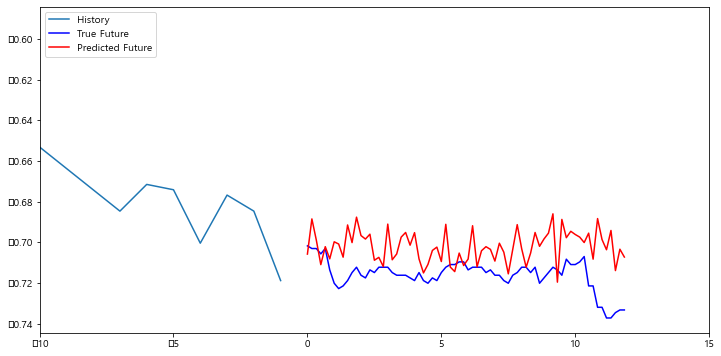

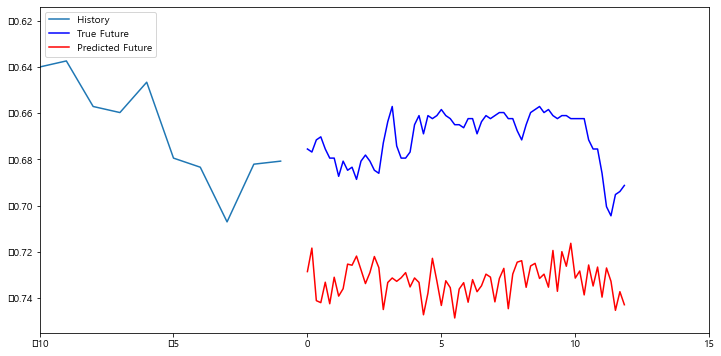

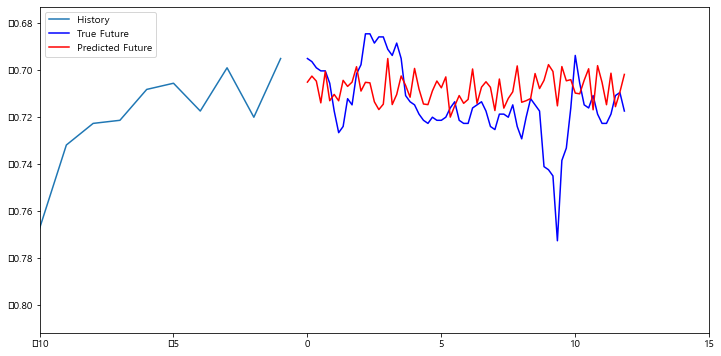

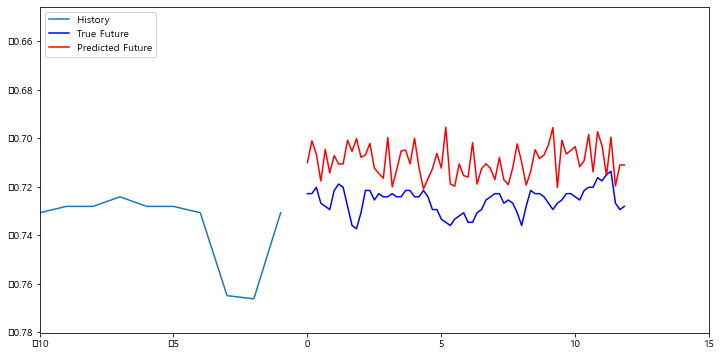

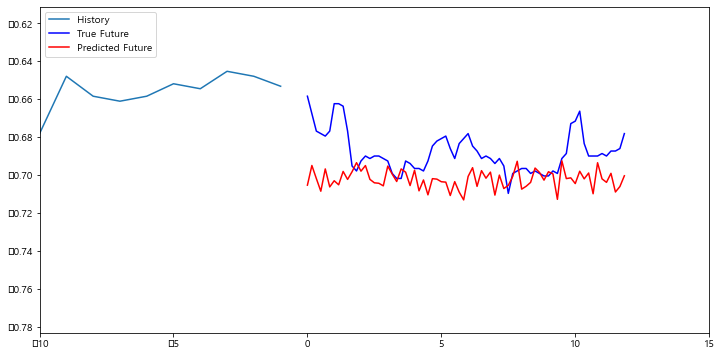

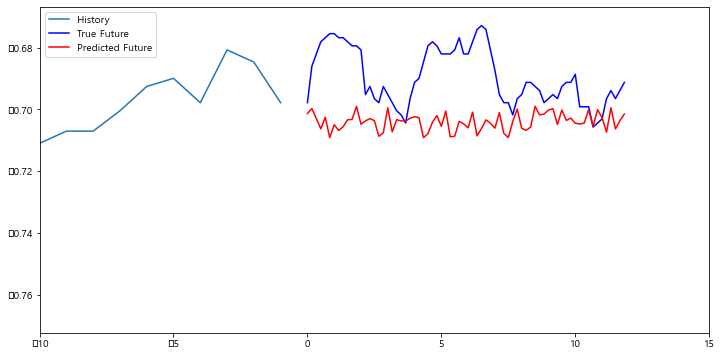

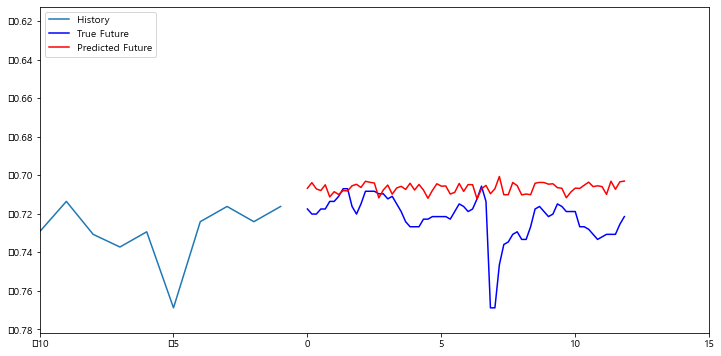

In [199]:
for x, y in val_data_multi.take(20):
    multi_step_plot(x[0],y[0],multi_step_model.predict(x)[0])

In [ ]:
정확도 계산, 파라미터 튜닝, + 역률 돌려보기 + 원인 분석!